# Estimating 'buckets' as a Function of 'n' and 'k'

This notebook analyzes the relationship between the number of 'buckets' and the parameters 'n' and 'k' using data from `df_oddOdd.csv`. We hypothesize a logarithmic model of the form:

$$
\log(\text{buckets}) = a \log(n) + b \log(k) + c
$$

We will fit this model, evaluate its performance, and define a Python function to estimate 'buckets' for given values of 'n' and 'k'.

## 1. Load Data from CSV

We begin by loading the data from `df_oddOdd.csv` using pandas and displaying the first few rows.

In [1]:
import pandas

dataFrameOddOdd = pandas.read_csv('df_oddOdd.csv')
dataFrameOddOdd.head()

,n,k,buckets
0,2,1,1
1,6,3,13
2,10,5,71
3,12,5,188
4,14,7,347


## 2. Visualize Data Relationships

Let's visualize how 'buckets' relates to 'n' and 'k' using scatter plots.

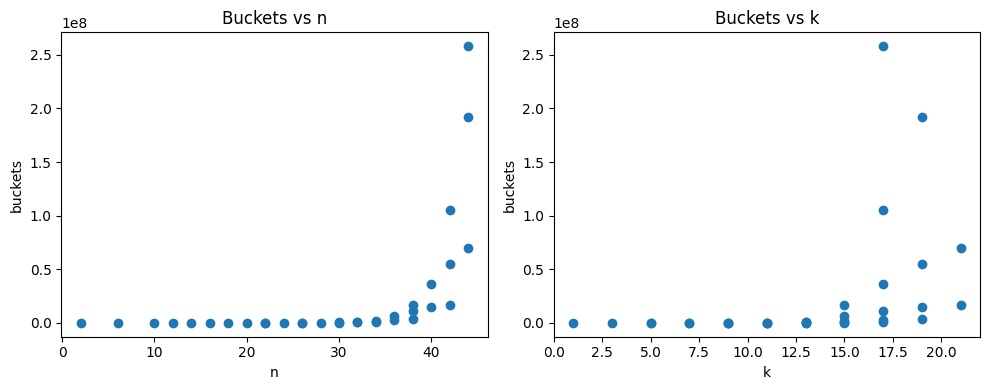

In [2]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(10, 4))
pyplot.subplot(1, 2, 1)
pyplot.scatter(dataFrameOddOdd['n'], dataFrameOddOdd['buckets'])
pyplot.xlabel('n')
pyplot.ylabel('buckets')
pyplot.title('Buckets vs n')

pyplot.subplot(1, 2, 2)
pyplot.scatter(dataFrameOddOdd['k'], dataFrameOddOdd['buckets'])
pyplot.xlabel('k')
pyplot.ylabel('buckets')
pyplot.title('Buckets vs k')

pyplot.tight_layout()
pyplot.show()

## 3. Transform Data for Logarithmic Analysis

Apply logarithmic transformations to 'buckets', 'n', and 'k' to prepare for model fitting.

In [3]:
import numpy

dataFrameOddOdd['log_n'] = numpy.log(dataFrameOddOdd['n'])
dataFrameOddOdd['log_k'] = numpy.log(dataFrameOddOdd['k'])
dataFrameOddOdd['log_buckets'] = numpy.log(dataFrameOddOdd['buckets'])
dataFrameOddOdd[['log_n', 'log_k', 'log_buckets']].head()

,log_n,log_k,log_buckets
0,0.693147,0.000000,0.000000
1,1.791759,1.098612,2.564949
2,2.302585,1.609438,4.262680
3,2.484907,1.609438,5.236442
4,2.639057,1.945910,5.849325


## 4. Fit Logarithmic Model

Fit a linear regression model to the transformed data:

$$
\log(\text{buckets}) = a \log(n) + b \log(k) + c
$$

In [4]:
from sklearn.linear_model import LinearRegression

arrayFeatures = dataFrameOddOdd[['log_n', 'log_k']].values
arrayTarget = dataFrameOddOdd['log_buckets'].values
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(arrayFeatures, arrayTarget)

coefficientA = linearRegressionModel.coef_[0]
coefficientB = linearRegressionModel.coef_[1]
interceptC = linearRegressionModel.intercept_

print(f"Fitted model: log(buckets) = {coefficientA:.4f} * log(n) + {coefficientB:.4f} * log(k) + {interceptC:.4f}")

Fitted model: log(buckets) = 13.5498 * log(n) + -6.7147 * log(k) + -15.0645


## 5. Evaluate Model Performance

Assess the model fit using $R^2$ and plot predicted vs actual values.

R^2 of fit: 0.8649


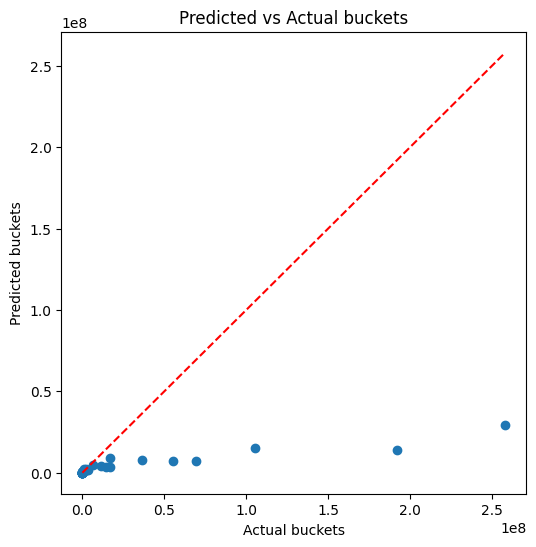

In [5]:
predictedLogBuckets = linearRegressionModel.predict(arrayFeatures)
predictedBuckets = numpy.exp(predictedLogBuckets)

rSquared = linearRegressionModel.score(arrayFeatures, arrayTarget)
print(f"R^2 of fit: {rSquared:.4f}")

pyplot.figure(figsize=(6, 6))
pyplot.scatter(dataFrameOddOdd['buckets'], predictedBuckets)
pyplot.xlabel('Actual buckets')
pyplot.ylabel('Predicted buckets')
pyplot.title('Predicted vs Actual buckets')
pyplot.plot([dataFrameOddOdd['buckets'].min(), dataFrameOddOdd['buckets'].max()],
         [dataFrameOddOdd['buckets'].min(), dataFrameOddOdd['buckets'].max()], 'r--')
pyplot.show()

## 6. Define Estimation Function in Python

Define a self-contained Python function to estimate 'buckets' given 'n' and 'k' using the fitted model.

In [6]:
def estimateBuckets(parameterN, parameterK):
    """
    Estimate the number of buckets given n and k using the fitted logarithmic model.
    """
    import numpy
    # Coefficients from the fitted model
    coefficientA = linearRegressionModel.coef_[0]
    coefficientB = linearRegressionModel.coef_[1]
    interceptC = linearRegressionModel.intercept_
    return numpy.exp(coefficientA * numpy.log(parameterN) + coefficientB * numpy.log(parameterK) + interceptC)

# Example usage:
estimated = estimateBuckets(22, 11)
print(f"Estimated buckets for n=22, k=11: {estimated:.2f}")

Estimated buckets for n=22, k=11: 45130.30


## 7. Test Estimation Function

Test the estimation function on several sample values and compare its output to actual data from the CSV.

In [7]:
for index, row in dataFrameOddOdd.head(10).iterrows():
    estimatedValue = estimateBuckets(row['n'], row['k'])
    print(f"n={row['n']}, k={row['k']}: Actual={row['buckets']}, Estimated={estimatedValue:.2f}")

n=2.0, k=1.0: Actual=1.0, Estimated=0.00
n=6.0, k=3.0: Actual=13.0, Estimated=6.28
n=10.0, k=5.0: Actual=71.0, Estimated=206.05
n=12.0, k=5.0: Actual=188.0, Estimated=2437.04
n=14.0, k=7.0: Actual=347.0, Estimated=2054.82
n=16.0, k=7.0: Actual=1042.0, Estimated=12547.35
n=18.0, k=9.0: Actual=1643.0, Estimated=11449.53
n=20.0, k=9.0: Actual=5428.0, Estimated=47730.00
n=22.0, k=11.0: Actual=7692.0, Estimated=45130.30
n=22.0, k=9.0: Actual=13497.0, Estimated=173641.31
